In [1]:
import sys
sys.path.append('../src')

In [2]:
from metrics import calculate_false_alarm, calculate_delay, calculate_precision, compute_metrics
from loading import *
from visualization import *
from features import *
from helpers import *

from matplotlib import pyplot as plt
%matplotlib inline

# Extract metrics for feature according to threshold value

In [3]:
data_path = "../data/"
patient_data = load_patient_seizures(data_path, 1,all_seizures=True, delta=1)

Seizure starts (s):  [[ 432362.43824219]
 [1029684.37003906]]
Seizure ends (s):  [[ 432976.20269531]
 [1030274.18042969]]
Duration (s):  [[613.76445313]
 [589.81039063]]
Sampled frequency (Hz):  512
Start/end [432362.43824219] [432976.20269531]
Start/end [1029684.37003906] [1030274.18042969]
EEG files:  [['../data/ID01/ID01_120h.mat', '../data/ID01/ID01_121h.mat', '../data/ID01/ID01_122h.mat'], ['../data/ID01/ID01_286h.mat', '../data/ID01/ID01_287h.mat', '../data/ID01/ID01_288h.mat']]
Hour of seizure:  [array([120, 121, 122]), array([286, 287, 288])]
Samples ranges:  [(185568, 499815), (43197, 345180)]


In [4]:
eegs = patient_data['eegs']
ranges = patient_data['ranges']
seizure_start_s = patient_data["infos"]["seizure_start"]
seizure_end_s = patient_data["infos"]["seizure_end"] 

In [5]:
max_power_eeg = top_signals(eegs, ranges, top=1, id_seizure = None)

## Convert seizure sample ranges into sliding window ranges

In [6]:
window_size = 128
step_size = 64

In [7]:
indexes = convert_sample_ranges_to_window_ranges(ranges,window_size,step_size,1843200)

# Computing signal energy with window

In [8]:
energy_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_energy, max_power_eeg[0])

In [9]:
line_length_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_line_length, max_power_eeg[0])

In [10]:
moving_avg_feature_signals = calculate_feature(eegs, window_size, step_size, calculate_moving_avg, max_power_eeg[0])

In [11]:
all_data_window_ranges, all_data_energy = merge_all_data(energy_feature_signals, indexes)
all_data_window_ranges, all_data_line_length = merge_all_data(line_length_feature_signals, indexes)
all_data_window_ranges, all_data_moving_avg = merge_all_data(moving_avg_feature_signals, indexes)

## Plotting the results

### Energy feature

time 98891
data 172794


[]

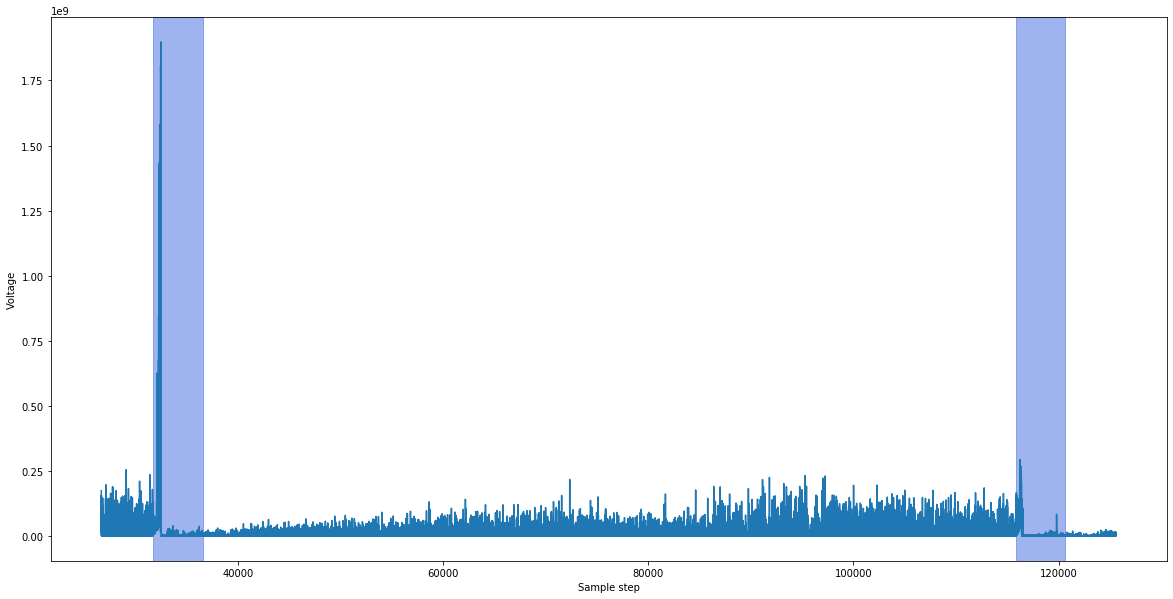

In [12]:
plot_one_signal(all_data_energy , all_data_window_ranges, 10000)

### Line length feature

time 98891
data 172794


[]

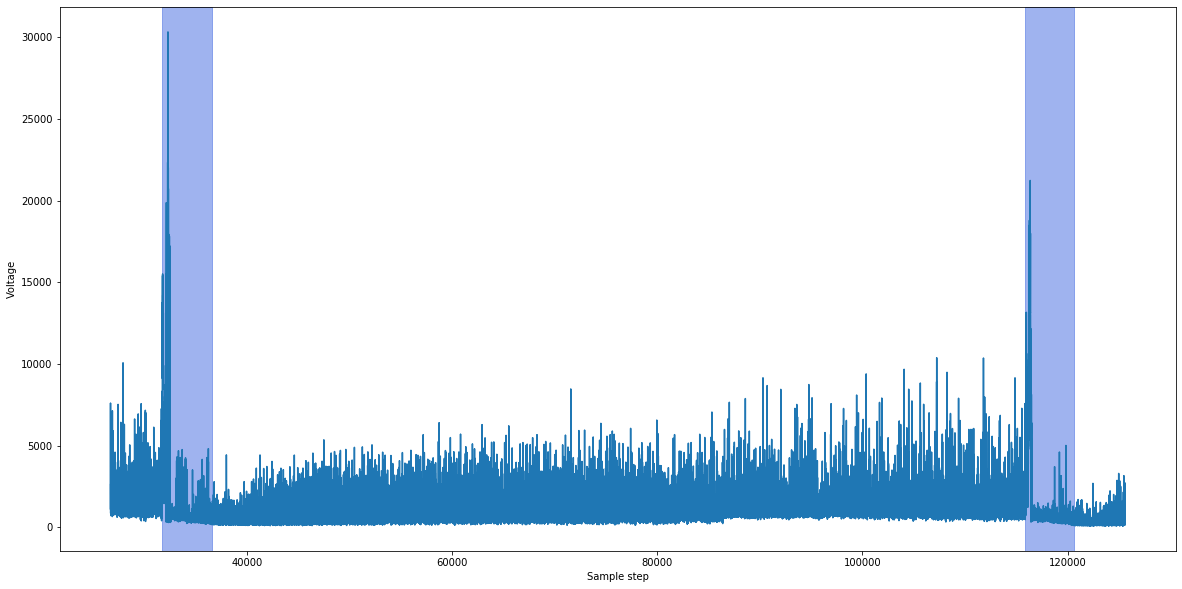

In [13]:
plot_one_signal(all_data_line_length , all_data_window_ranges, 10000)

### Moving AVG feature

time 98891
data 172794


[]

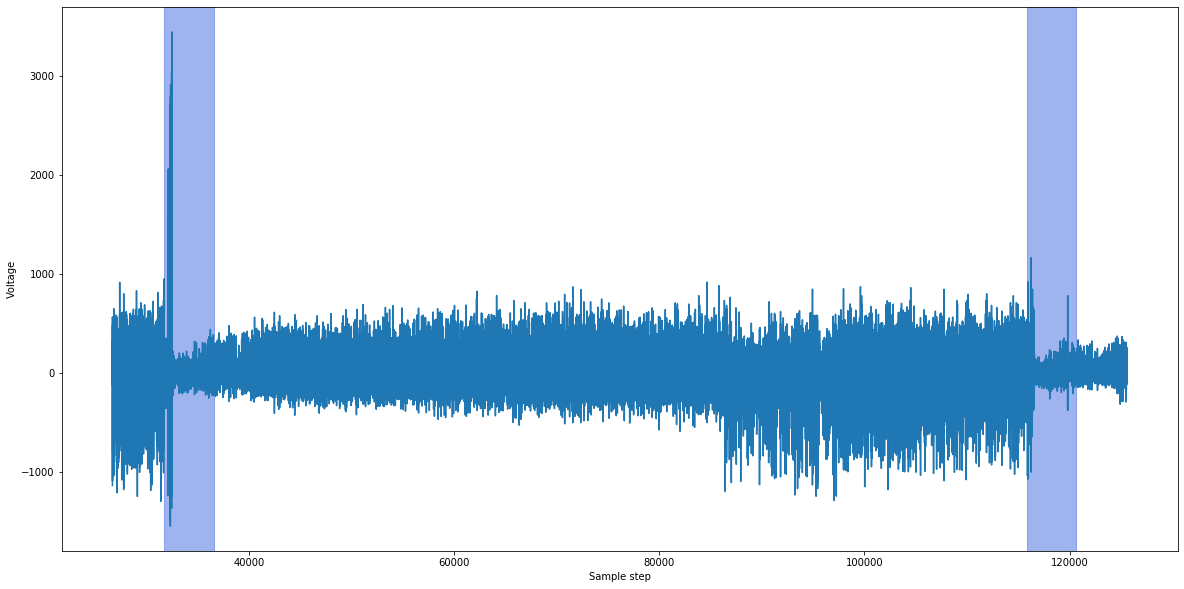

In [14]:
plot_one_signal(all_data_moving_avg , all_data_window_ranges, 10000)

# Plotting real signal and computed energy signal

In [15]:
energy_seizure1_single = energy_feature_signals[0][1]
energy_seizure1_single_scaled = scale_signal(energy_seizure1_single, 128, 64)

In [16]:
line_length_seizure1_single = line_length_feature_signals[0][1]
line_length_seizure1_single_scaled = scale_signal(line_length_seizure1_single, 128, 64)

In [17]:
moving_avg_seizure1_single = moving_avg_feature_signals[0][1]
moving_avg_seizure1_single_scaled = scale_signal(moving_avg_seizure1_single, 128, 64)

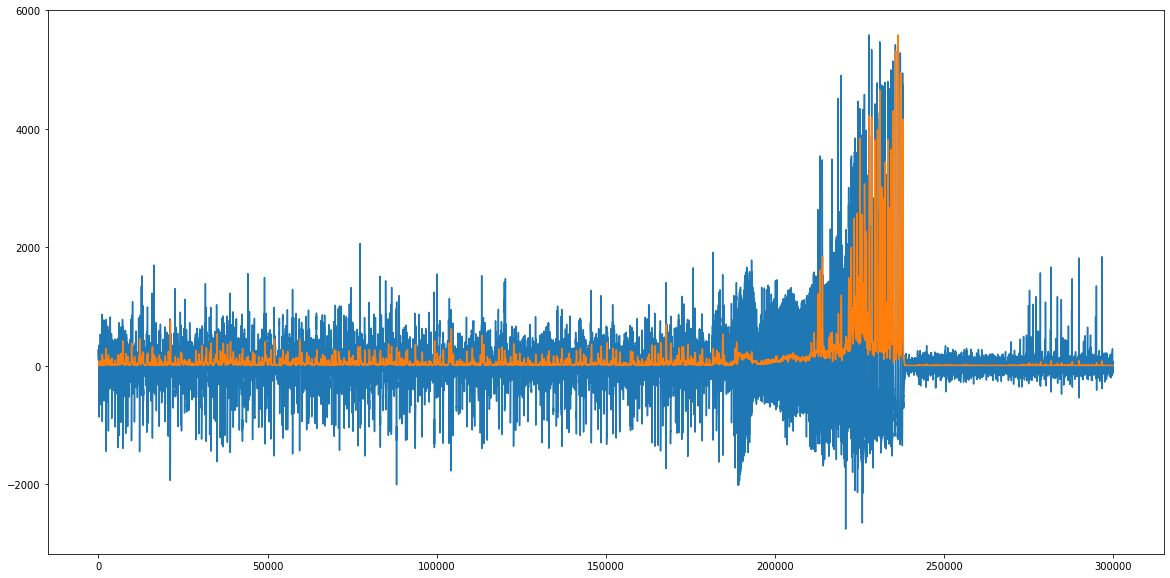

In [18]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:300000])
plt.plot(energy_seizure1_single_scaled[:300000]/np.max(energy_seizure1_single_scaled)*np.max(real_signal))

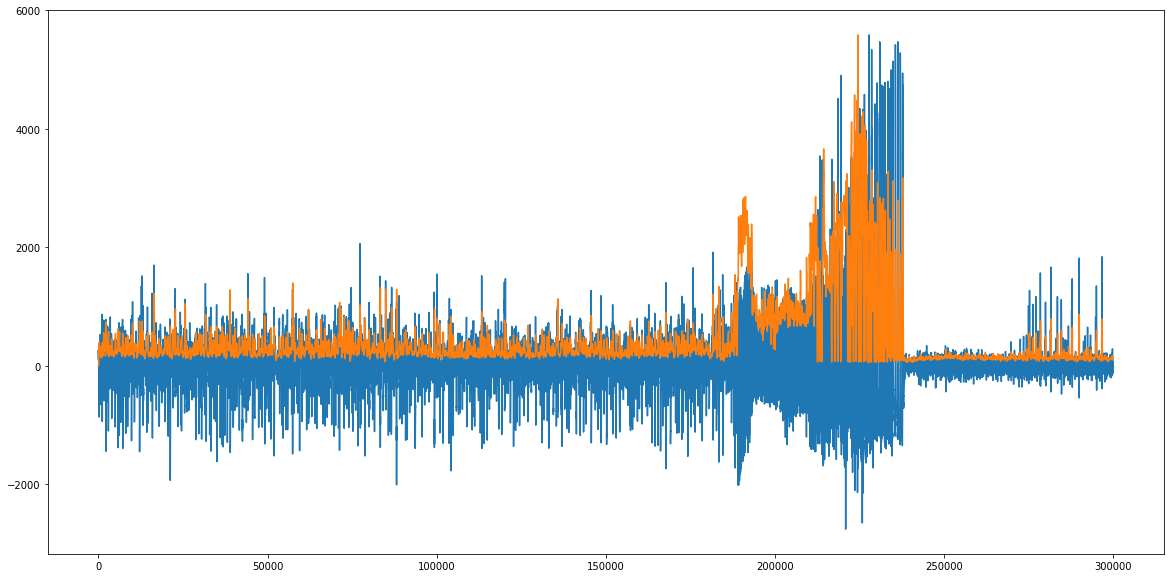

In [19]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:300000])
plt.plot(line_length_seizure1_single_scaled[:300000]/np.max(line_length_seizure1_single_scaled)*np.max(real_signal))

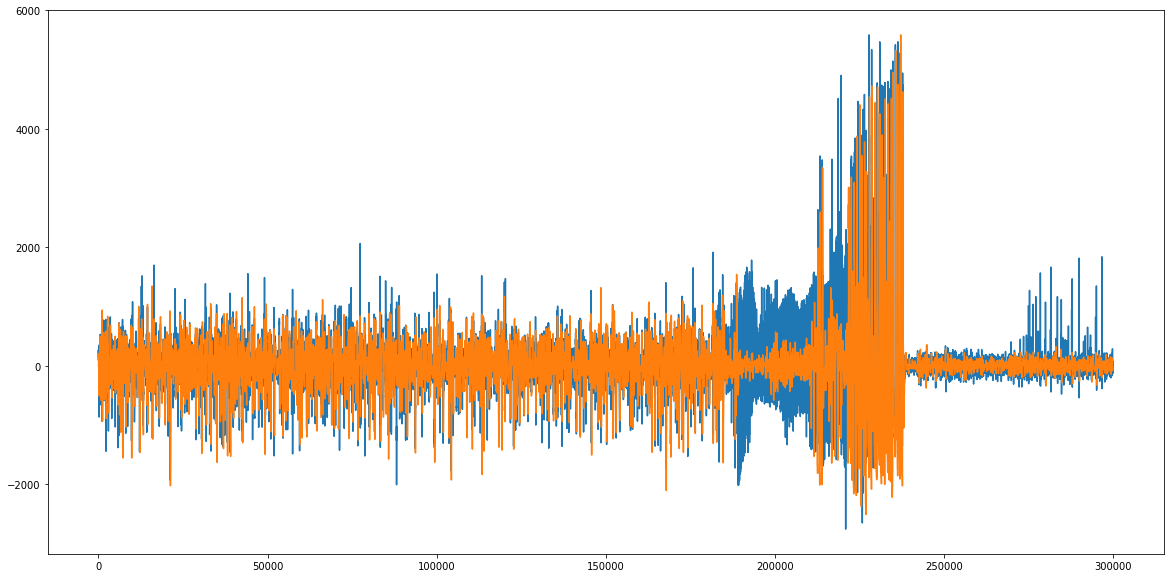

In [20]:
plt.figure(figsize=(20,10))
real_signal = eegs[0][1][max_power_eeg].T
plt.plot(real_signal[:300000])
plt.plot(moving_avg_seizure1_single_scaled[:300000]/np.max(moving_avg_seizure1_single_scaled)*np.max(real_signal))

# Calculate metrics according to the threshold value

# Plotting the functions

In [21]:
thresholds, false_alarms_energy, delays_energy, precisions_energy = compute_metrics(all_data_energy, all_data_window_ranges, window_size, step_size)

In [22]:
thresholds, false_alarms_line_length, delays_line_length, precisions_line_length = compute_metrics(all_data_line_length, all_data_window_ranges, window_size, step_size)

In [23]:
thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg = compute_metrics(all_data_moving_avg, all_data_window_ranges, window_size, step_size)

## Energy feature

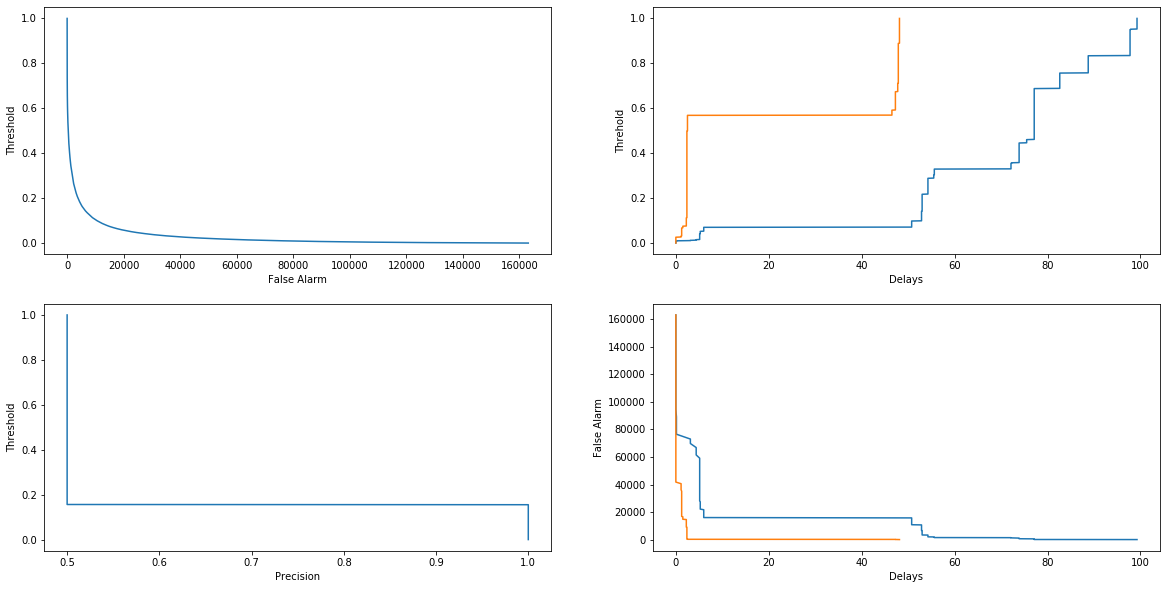

In [24]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_energy, delays_energy, precisions_energy)

In [25]:
weights = (1,1,1)

In [26]:
scores_energy  = compute_score_on_seizures(thresholds, false_alarms_energy, precisions_energy, delays_energy, weights)

Max score for seizure 0 is 0.9934333901498692 for t=0.07
FA: 15987
Delay: 6.000208340567381
Precision: 1.0

Max score for seizure 1 is 0.9990904929420596 for t=0.155
FA: 5744
Delay: 2.375082468141255
Precision: 1.0



In [27]:
compute_overall_score(scores_energy)

Distance score 0.04259402191623082
Averaged seizures score 0.9962619415459644
Overall score 23.389712845274424


23.389712845274424

## Line length feature

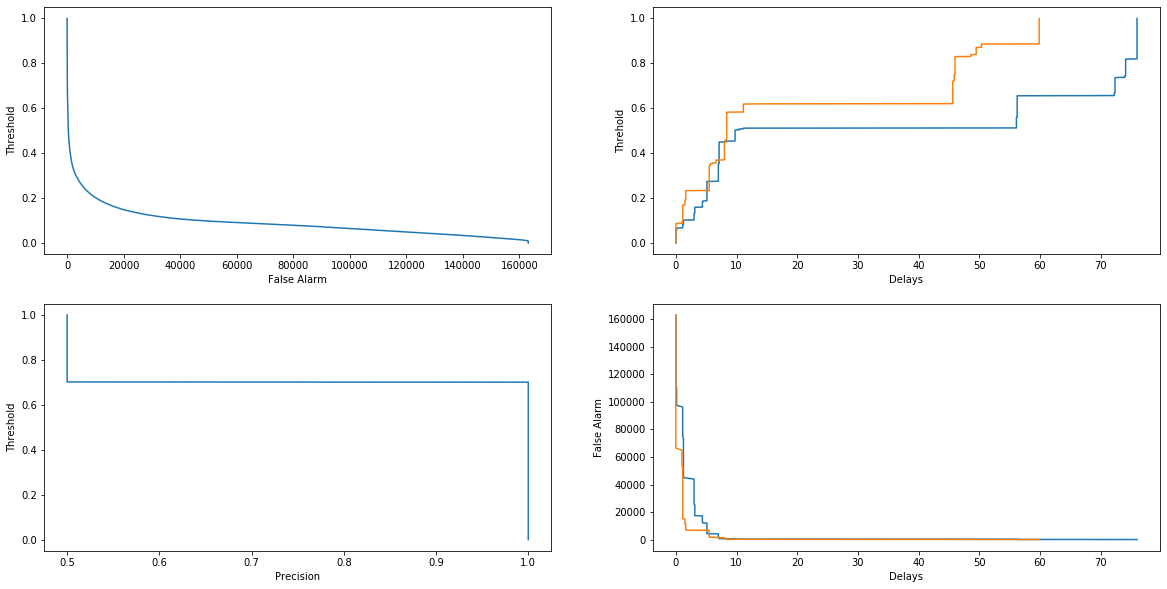

In [28]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_line_length, delays_line_length, precisions_line_length)

In [29]:
scores_line_length = compute_score_on_seizures(thresholds, false_alarms_line_length, precisions_line_length, delays_line_length, weights)

Max score for seizure 0 is 0.9973877063264285 for t=0.274
FA: 4280
Delay: 5.1251779575679715
Precision: 1.0

Max score for seizure 1 is 0.9988777620561303 for t=0.233
FA: 6887
Delay: 1.6250564255703324
Precision: 1.0



In [30]:
compute_overall_score(scores_line_length)

Distance score 0.020513533740421332
Averaged seizures score 0.9981327341912793
Overall score 48.65727898575014


48.65727898575014

## Moving AVG feature

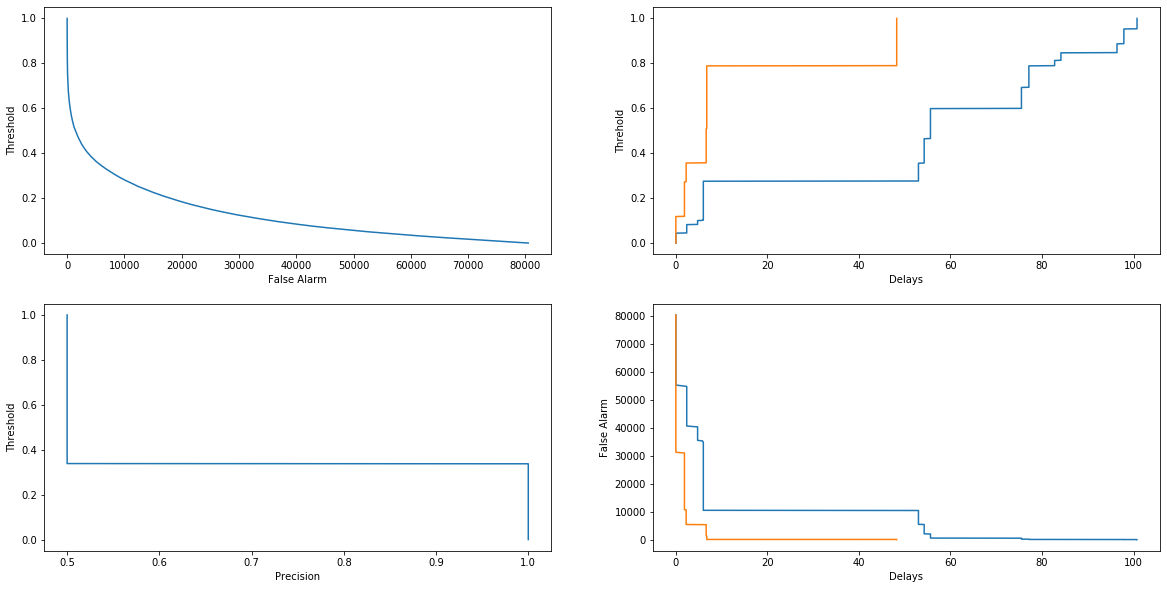

In [31]:
plt_all_metrics = plot_metrics(thresholds, false_alarms_moving_avg, delays_moving_avg, precisions_moving_avg)

In [32]:
scores_moving_avg = compute_score_on_seizures(thresholds, false_alarms_moving_avg, precisions_moving_avg, delays_moving_avg, weights)

Max score for seizure 0 is 0.9898961345152858 for t=0.275
FA: 10487
Delay: 6.000208340567381
Precision: 1.0

Max score for seizure 1 is 0.9965901191066481 for t=0.337
FA: 6415
Delay: 2.2500781277127677
Precision: 1.0



In [33]:
compute_overall_score(scores_moving_avg)

Distance score 0.03118015967610411
Averaged seizures score 0.9932431268109669
Overall score 31.85497242889907


31.85497242889907